In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Adithya\\Desktop\\price_prediction.csv")

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df = df.drop(['stories','hotwaterheating','airconditioning'],axis="columns")

In [10]:
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,2,no,unfurnished
541,1767150,2400,3,1,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,yes,no,no,0,no,unfurnished
543,1750000,2910,3,1,no,no,no,0,no,furnished


In [11]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
le

LabelEncoder()

In [14]:
df['mainroad'] = le.fit_transform (df['mainroad'])
df['guestroom'] = le.fit_transform (df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['prefarea'] = le.fit_transform (df['prefarea'])
df['furnishingstatus'] = le.fit_transform (df['furnishingstatus'])

In [15]:
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,1,0,1,2,0,1
16,9100000,6600,4,2,1,1,1,1,1,2
17,8960000,8500,3,2,1,0,0,2,0,0
18,8890000,4600,3,2,1,1,0,2,0,0
19,8855000,6420,3,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,2,0,2
541,1767150,2400,3,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,0,0,0,2
543,1750000,2910,3,1,0,0,0,0,0,0


In [16]:
x = df.drop(['price'], axis='columns')
x

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
15,6000,4,1,1,0,1,2,0,1
16,6600,4,2,1,1,1,1,1,2
17,8500,3,2,1,0,0,2,0,0
18,4600,3,2,1,1,0,2,0,0
19,6420,3,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,2,0,2
541,2400,3,1,0,0,0,0,0,1
542,3620,2,1,1,0,0,0,0,2
543,2910,3,1,0,0,0,0,0,0


In [17]:
y = df['price']
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 530, dtype: int64

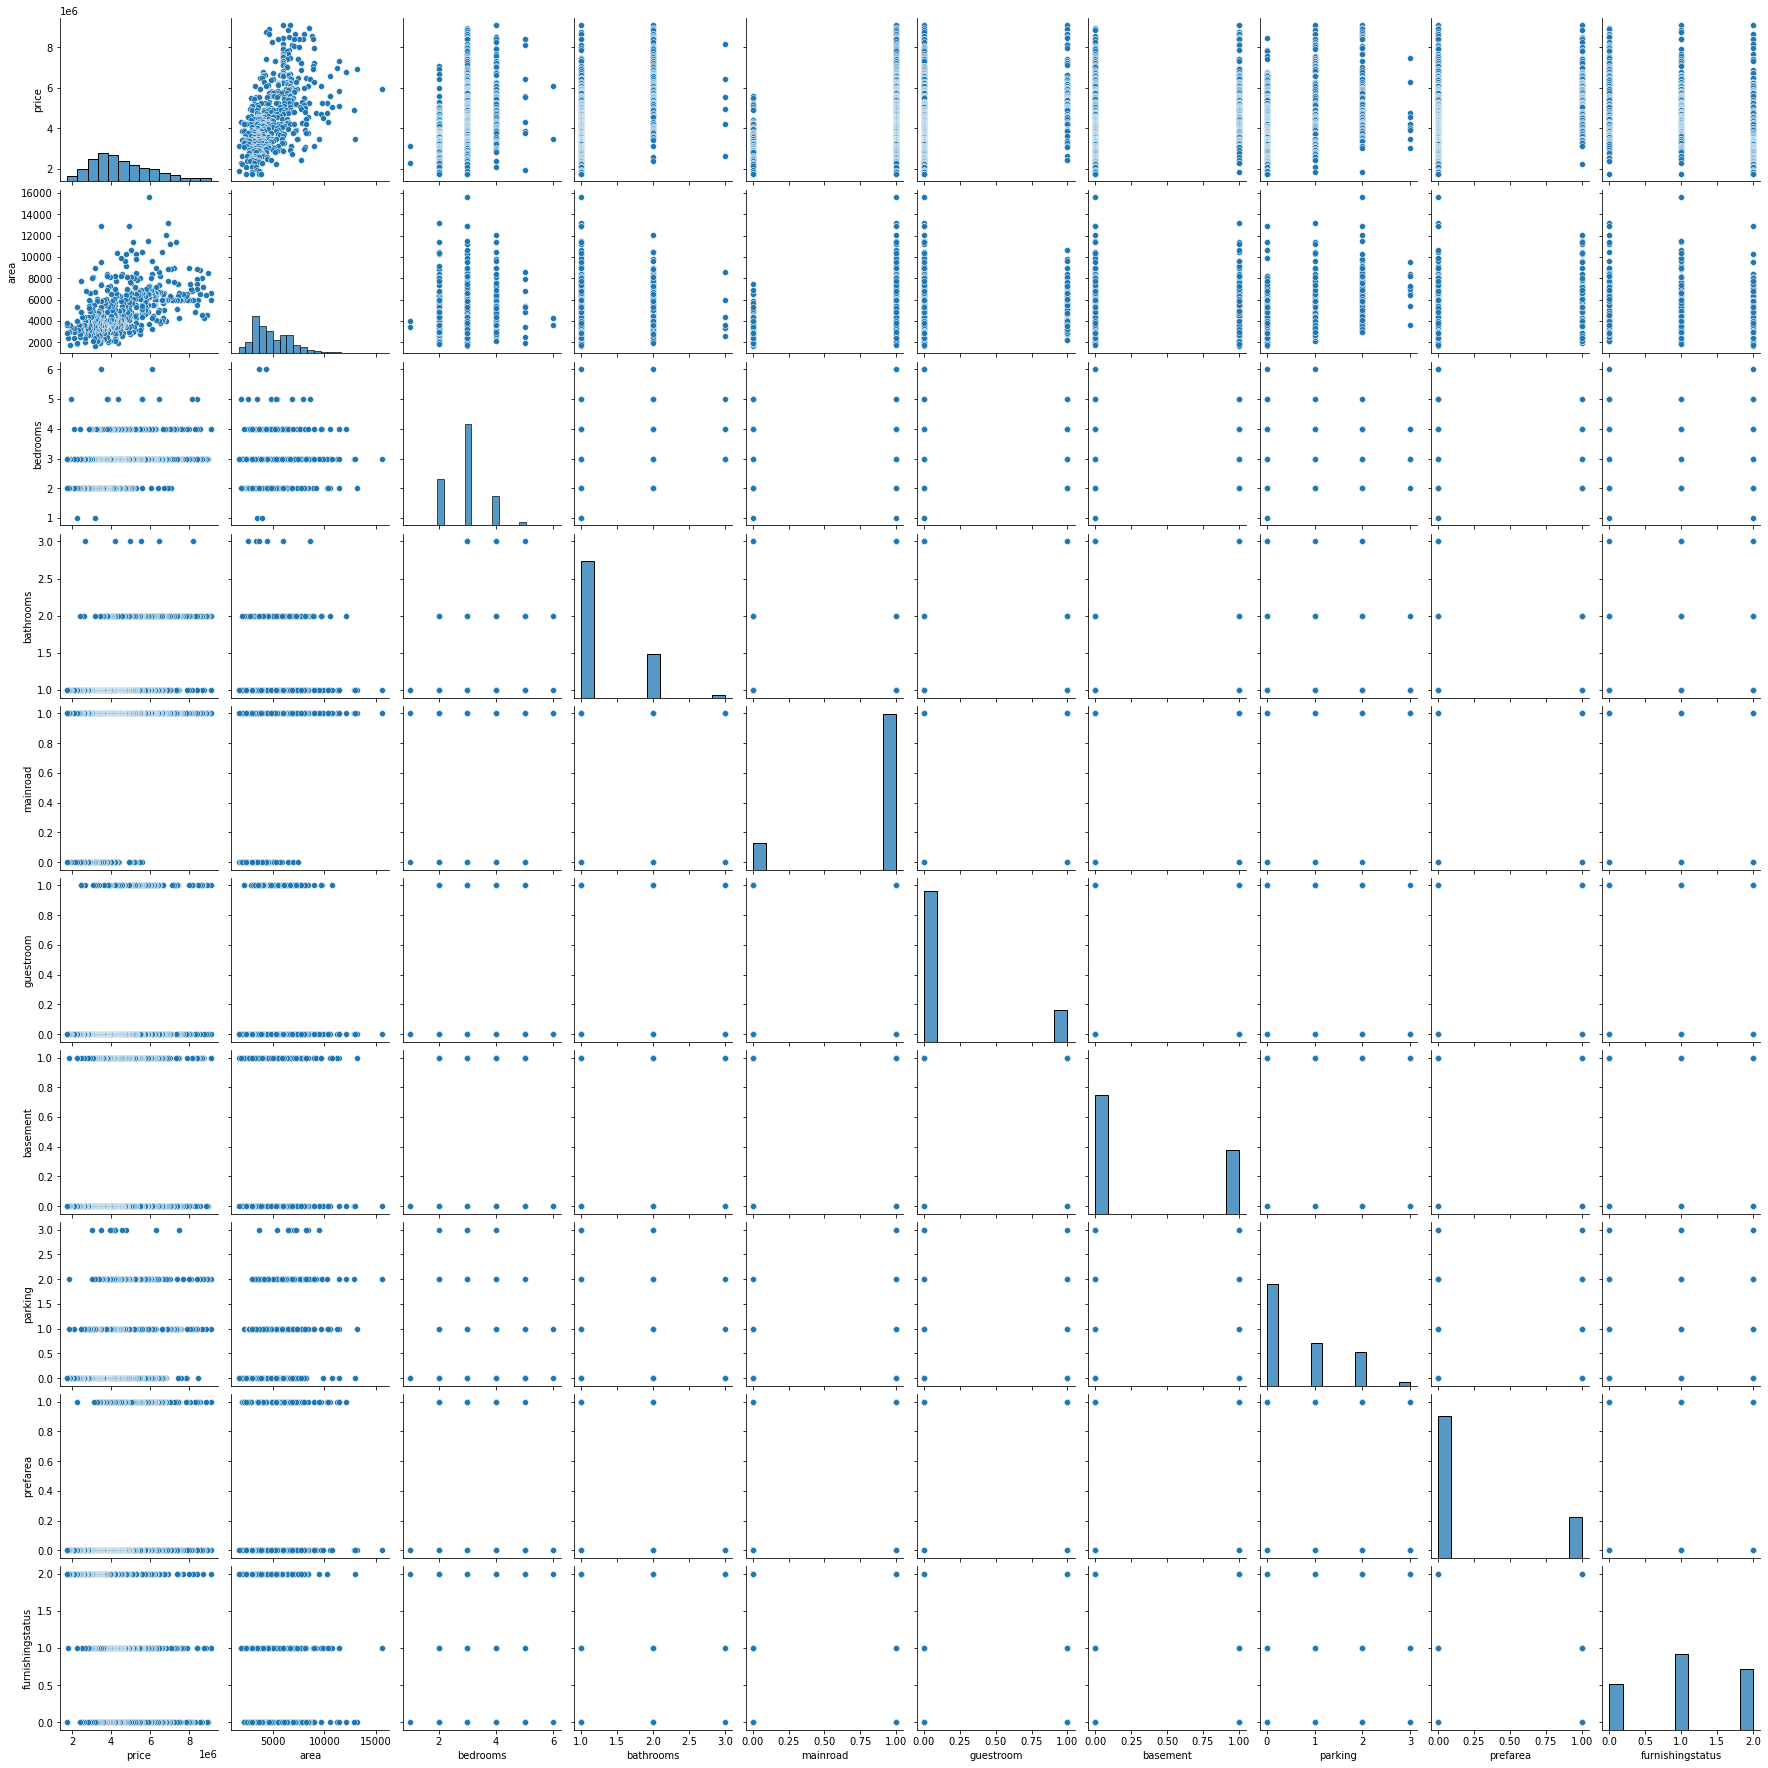

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=10)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [20]:
model

LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.predict([[9320,3,0,1,1,1,0,1,2]])

array([4875771.30576684])